## Philipp Panzenböck

#### The following codes show data query, data processing and data visualization with different visualization methods.

#### Importing modules

In [13]:
#Importing the relevant modules
import requests
import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mpl

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

from wordcloud import (WordCloud, get_single_color_func)

from IPython.display import display, Image

import seaborn as sns
import matplotlib.pyplot as plt

## Data query from the ECB job portal and creating a wordcloud

The following short script is used to retrieve the text of the job advertisement (Research Analyst - Statistics (ESCB/IO)), process it and create a word cloud (size = number of terms stemmed)

#### Data query from the website

Source: https://matix.io/extract-text-from-webpage-using-beautifulsoup-and-python/ (Customized)

In [14]:
# retrieval of the information of the website

url = 'https://talent.ecb.europa.eu/careers/JobDetail?jobId=5856'
res = requests.get(url)
html_page = res.content
soup = BeautifulSoup(html_page, 'html.parser')
text = soup.find_all(text=True)

output = ''
blacklist = ['[document]','a','article','aside','body','footer','h4','head','header','html',
             'label','link','main','meta','p','script','section','ul']

for t in text:
    if t.parent.name not in blacklist:
        output += '{} '.format(t)

#### Data processing (stopwords, stemming, removing special characters, counting)

In [15]:
# Removing stopwords
output = ' '.join([word for word in output.split() if word not in (stopwords.words('english'))])

In [16]:
print(f'{output[:1000]}...')

Research Analyst - Statistics (ESCB/IO) - - 5856 Research Analyst - Statistics (ESCB/IO) Knowledge, Information, Data&Statistics Statistics 5856 General Information Type contract Short-term contract, may extended 36 months subject individual performance organisational needs Contract end date 31.12.2024 Who apply? EU nationals working national central banks ESCB, international governmental organisations employers performing central banking banking supervision tasks. Salary E/F (1) (minimum full time monthly net salary €5424 benefits, see information section) Role specialisation Datasets Statistics Working time Full time Place work Frankfurt Main, Germany Closing date 13.07.2022 Your team You part Monetary Statistics Section Directorate General Statistics. Our Directorate General around 300 staff providing macroeconomic statistics, granular financial data supervisory data policymaking microprudential supervision. We currently working implementing new system based state-of-the-art technol

In [17]:
# remove (punctuation, numbers, special characters)
special = "1234567890!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~©€"

for i in list(special):
    output = output.replace(i,' ')
    output = output.replace('  ',' ')

In [18]:
output = output.lower()
word_list = output.split()

In [19]:
#Stemming of every single word
stemmed_word_list = []

for y in word_list:
    stemmed_word_list.append(stemmer.stem(y))

In [20]:
# Removing additional superfluous words
remove = ['the','of','you','as','e']
for i in remove:
    while i in stemmed_word_list:
        stemmed_word_list.remove(i)  

In [21]:
stemmed_word_list[:10]

['research',
 'analyst',
 'statist',
 'escb',
 'io',
 'research',
 'analyst',
 'statist',
 'escb',
 'io']

In [22]:
# Counting the frequency of the words (stemmed)

word_count = pd.value_counts(np.array(stemmed_word_list))
word_count_df = pd.DataFrame(word_count)

In [23]:
word_count_df.head(5)

,0
statist,17
work,7
posit,7
inform,6
analyst,5


### WordCloud

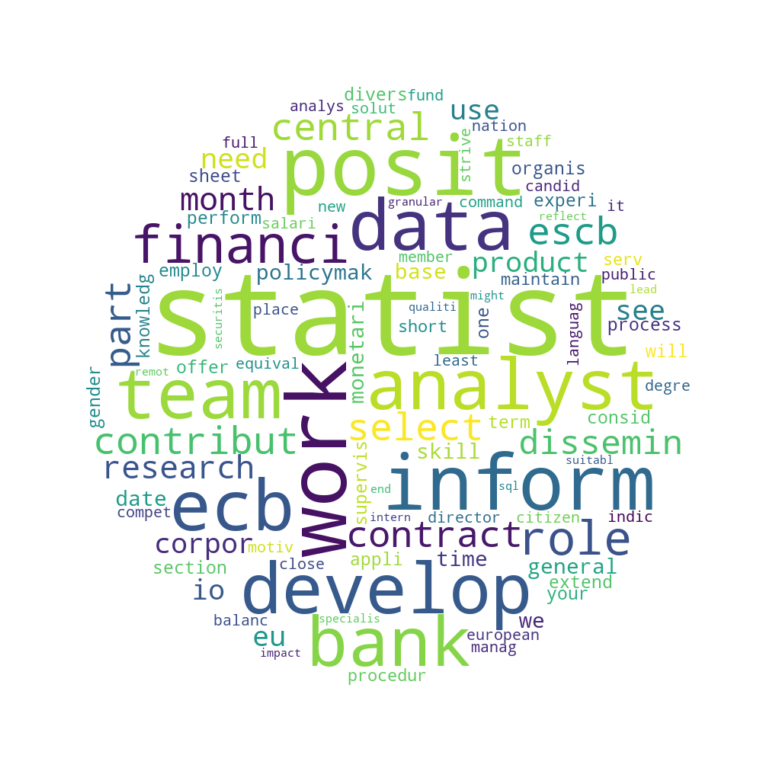

In [24]:
#creating a round word cloud of the stemmed words
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

data = word_count_df.to_dict()[0]
wordcloud = WordCloud(background_color="white", width=800, height=400, max_words=100, mask=mask).generate_from_frequencies(data)

plt.figure(figsize=(14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()